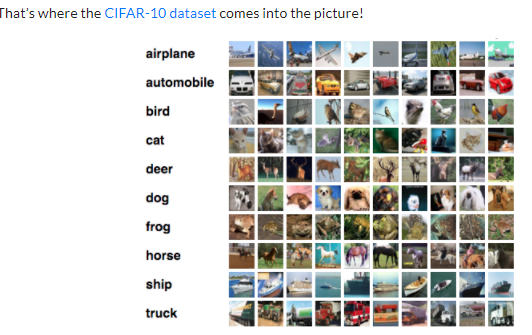

Here’s how the developers behind CIFAR (Canadian Institute For Advanced Research) describe the dataset:

The CIFAR-10 dataset consists of 60,000 32 x 32 colour images in 10 classes, with 6,000 images per class. There are 50,000 training images and 10,000 test images.

The important points that distinguish this dataset from MNIST are:

Images are colored in CIFAR-10 as compared to the black and white texture of MNIST
Each image is 32 x 32 pixel
50,000 training images and 10,000 testing images

In [ ]:
from keras.datasets import cifar10
from keras.utils import np_utils

Load the dataset

In [ ]:
(X_train,y_train), (X_test,y_test)= cifar10.load_data()

print("X train shape:  ", X_train.shape)
print("y train shape:  ", y_train.shape)
print("X test shape:  ", X_test.shape)
print("y test shape:  ", y_test.shape)

Before we train a CNN model, let’s build a basic Fully Connected Neural Network for the dataset. The basic steps to build an image classification model using a neural network are:
1.	Normalize the image pixel values (divide by 255)
3.	One-Hot Encode the categorical column
4.	Build a model architecture (Sequential) with Dense layers
5.	Train the model and make predictions


In [ ]:
X_train = X_train.reshape(X_train.shape[0],32,32,3)
X_test = X_test.reshape(X_test.shape[0],32,32,3)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

.	Normalize the image pixel values (divide by 255)

In [ ]:
X_train=X_train/255
X_test=X_test/255

In [ ]:
n_classes=10
y_train = np_utils.to_categorical(y_train,n_classes)
y_test = np_utils.to_categorical(y_test,n_classes)
print("y train shape:  ", y_train.shape)
print("y test shape:  ", y_test.shape)

Build the model

In [ ]:
from keras.models import Sequential
model= Sequential()

add convolution layer, maxpooling layer and the flattening  layer


In [ ]:
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
model.add(Conv2D(50, kernel_size = (3,3), strides = (1,1), padding = 'same', activation = 'relu' , input_shape = (32,32,3)))

model.add(Conv2D(75, kernel_size = (3,3), strides = (1,1), padding = 'same', activation = 'relu' ))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(125, kernel_size = (3,3), strides = (1,1), padding = 'same', activation = 'relu' ))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())


In [ ]:
model.add(Dense(500, activation = 'relu'))
model.add(Dropout(0.4))
model.add(Dense(250, activation = 'relu'))
model.add(Dropout(0.3)
)
model.add(Dense (10, activation = 'softmax'))
model.summary()

In [ ]:
model.compile(optimizer= 'adam', loss= 'categorical_crossentropy', metrics= ['accuracy'])

In [ ]:
model.fit(X_train,y_train, batch_size=512, epochs=10, validation_data= (X_test, y_test))

How to predict an image's type?

Load an image.

Resize it to a predefined size 

Scale the value of the pixels to the range [0, 255].

Select a pre-trained model.

Run the pre-trained model.

Display the results.